In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [5]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.shape

(100000, 9)

In [8]:
cat_col = df.select_dtypes(include=object).columns
cat_col= cat_col.tolist()
cat_col

['gender', 'smoking_history']

In [9]:
for i in cat_col:
    print(df[i].value_counts())

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


In [10]:
df.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

### This data is imbalanced

<Axes: xlabel='diabetes', ylabel='Count'>

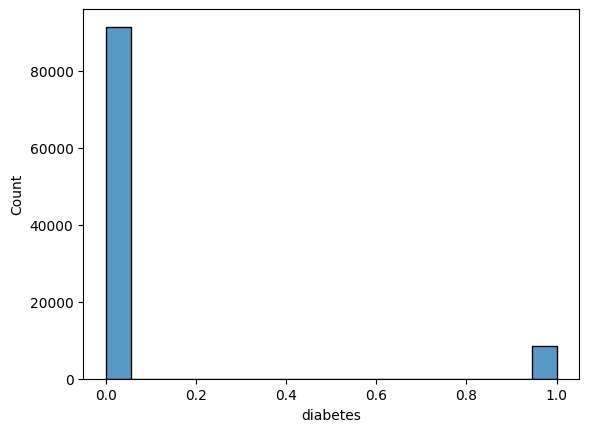

In [11]:
#plt.figure(figsize=(10,5))
sns.histplot(df['diabetes'])

In [12]:
X = df.drop(columns=['diabetes'],axis=1)
y = df['diabetes']

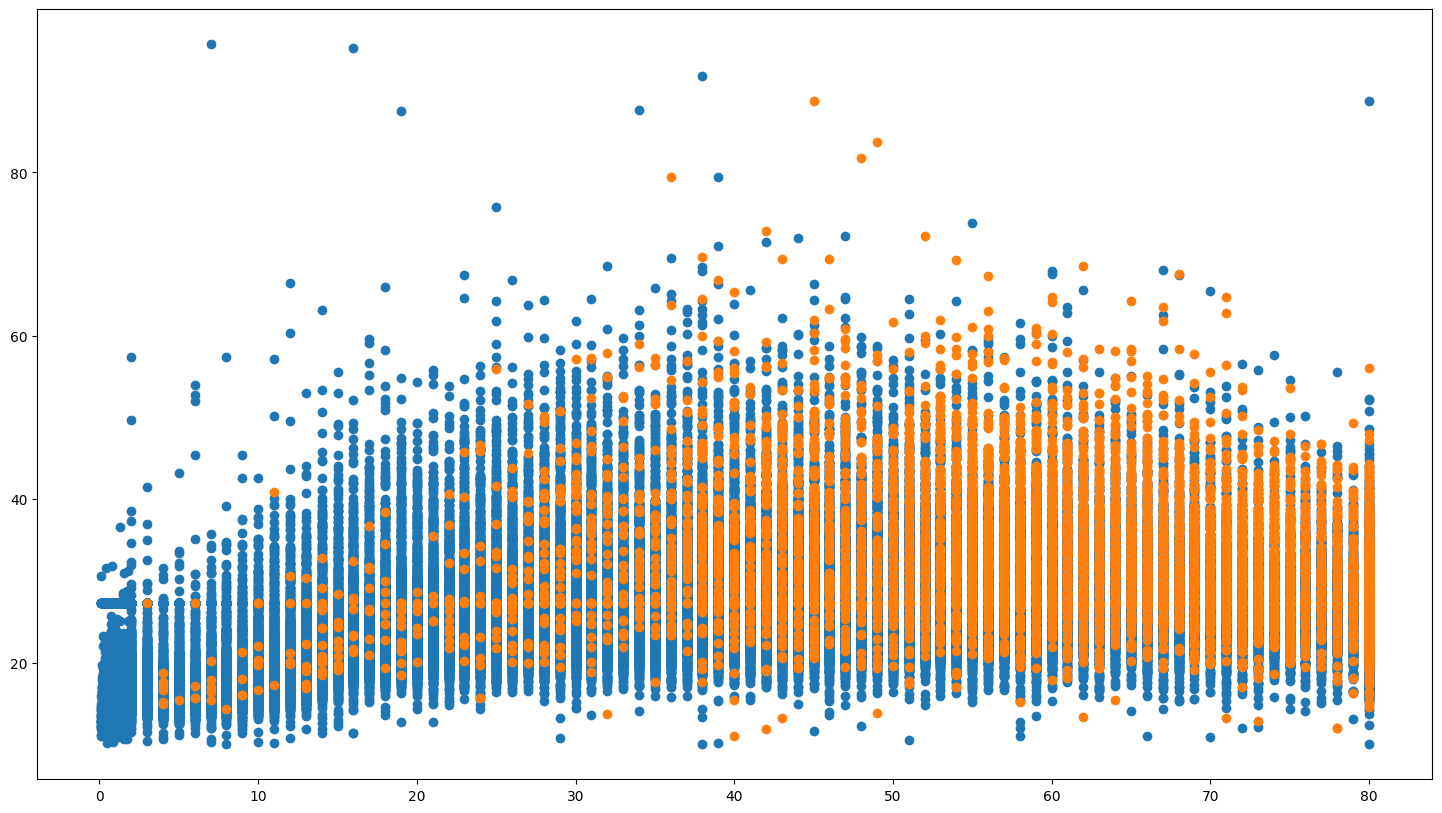

In [13]:

#ploting the imbalance dataset
import imblearn
from collections import Counter
counter = Counter(y)
plt.figure(figsize=(18,10))
for label,_ in counter.items():
    
    row_ix = np.where(y == label )[0]
    plt.scatter(X.loc[row_ix,'age'],X.loc[row_ix,'bmi'])


# Undersampling 1 - Random

After resampeling dataset shape Counter({0: 8500, 1: 8500})


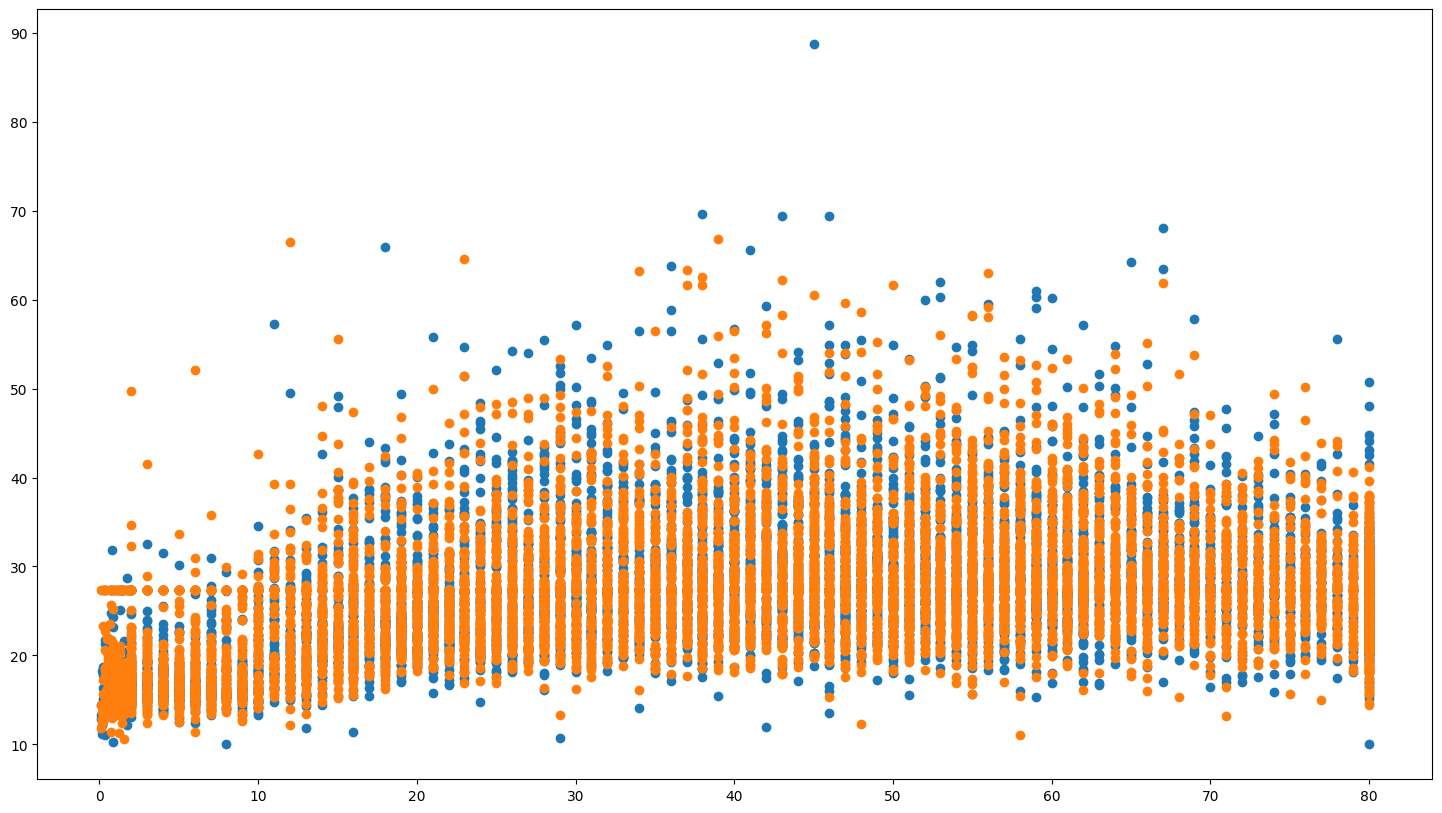

In [14]:
from imblearn.under_sampling import RandomUnderSampler,ClusterCentroids # we can use this as well this is similar to Kmean Cluster
from collections import Counter
rs = RandomUnderSampler(random_state=41)
X_res,y_res = rs.fit_resample(X,y)

print("After resampeling dataset shape %s" %Counter(y_res))
plt.figure(figsize=(18,10))
counter = Counter(y_res)
for label,_ in counter.items():
    idx = np.where(y_res == label)[0]
    plt.scatter(X.loc[idx,'age'],X.loc[idx,'bmi'])

In [16]:
models = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'Adaboosst':AdaBoostClassifier(),
    'RandomForest':RandomForestClassifier(),
    
}

In [17]:
# Transforming the data by creaaing pipeline
cat_col = df.select_dtypes(include=object)
cat_col = list(cat_col)
cat_pipeline = Pipeline([
    ('ohe',OneHotEncoder(drop='first'))
])
preprocessor = ColumnTransformer([
    ('cat',cat_pipeline,cat_col)
],remainder='passthrough')

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

X_train_encoded= preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


In [18]:
col_name = list(preprocessor.get_feature_names_out())

In [19]:
def train_model(X_train,X_test,y_train,y_test):

    for model in models.values():
        model.fit(X_train,y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        score_train = balanced_accuracy_score(y_train,y_pred_train)
        score_test = balanced_accuracy_score(y_test,y_pred=y_pred_test)
        print('Traning Accuracy:')
        print(f'model name:{model}:{score_train}')
        print('Test Accuracy :')
        print(f'model name:{model}:{score_test}')
        print('-'*20)

 


In [20]:
train_model(X_train_encoded,X_test_encoded,y_train,y_test)

c:\Users\Tafique Hossain Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Traning Accuracy:
model name:LogisticRegression():0.8814538487391963
Test Accuracy :
model name:LogisticRegression():0.8856242804510022
--------------------
Traning Accuracy:
model name:DecisionTreeClassifier():0.9991896272285251
Test Accuracy :
model name:DecisionTreeClassifier():0.8814299175280492
--------------------
Traning Accuracy:
model name:AdaBoostClassifier():0.9156809958929133
Test Accuracy :
model name:AdaBoostClassifier():0.9099497513868458
--------------------
Traning Accuracy:
model name:RandomForestClassifier():0.9991904706572132
Test Accuracy :
model name:RandomForestClassifier():0.9035057759432992
--------------------


# Oversampeling

In [21]:
# using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
num_col = X.select_dtypes(include=['int','float'])
sm = SMOTE()
X_res,y_res = sm.fit_resample(num_col,y)
counter = Counter(y_res)




In [22]:
# Apply preprocessing to your data
X_preprocessed = preprocessor.fit_transform(X)
# Apply SMOTE to the numerical features only
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
train_model(X_train,X_test,y_train,y_test)

c:\Users\Tafique Hossain Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Traning Accuracy:
model name:LogisticRegression():0.8864884703630176
Test Accuracy :
model name:LogisticRegression():0.8840740416842188
--------------------
Traning Accuracy:
model name:DecisionTreeClassifier():0.9995696309756397
Test Accuracy :
model name:DecisionTreeClassifier():0.9714749876146627
--------------------
Traning Accuracy:
model name:AdaBoostClassifier():0.9677653878737242
Test Accuracy :
model name:AdaBoostClassifier():0.9677094073210933
--------------------
Traning Accuracy:
model name:RandomForestClassifier():0.9995628101724778
Test Accuracy :
model name:RandomForestClassifier():0.9814792322627799
--------------------


# Bagging classifier

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Transforming the data by creaaing pipeline
cat_col = df.select_dtypes(include=object)
cat_col = list(cat_col)
cat_pipeline = Pipeline([
    ('ohe',OneHotEncoder(drop='first'))
])
preprocessor = ColumnTransformer([
    ('cat',cat_pipeline,cat_col)
],remainder='passthrough')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train_encoded= preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       random_state=0)
bc.fit(X_train_encoded, y_train)
#BaggingClassifier(...)
y_pred = bc.predict(X_test_encoded)
print(f"Accuracy Score:{balanced_accuracy_score (y_test, y_pred)}")


c:\Users\Tafique Hossain Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy Score:0.8501311792923641


### considering undersampeling and taking adaboos alog for model prediction


# Final Model Building

In [1]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()

0
1


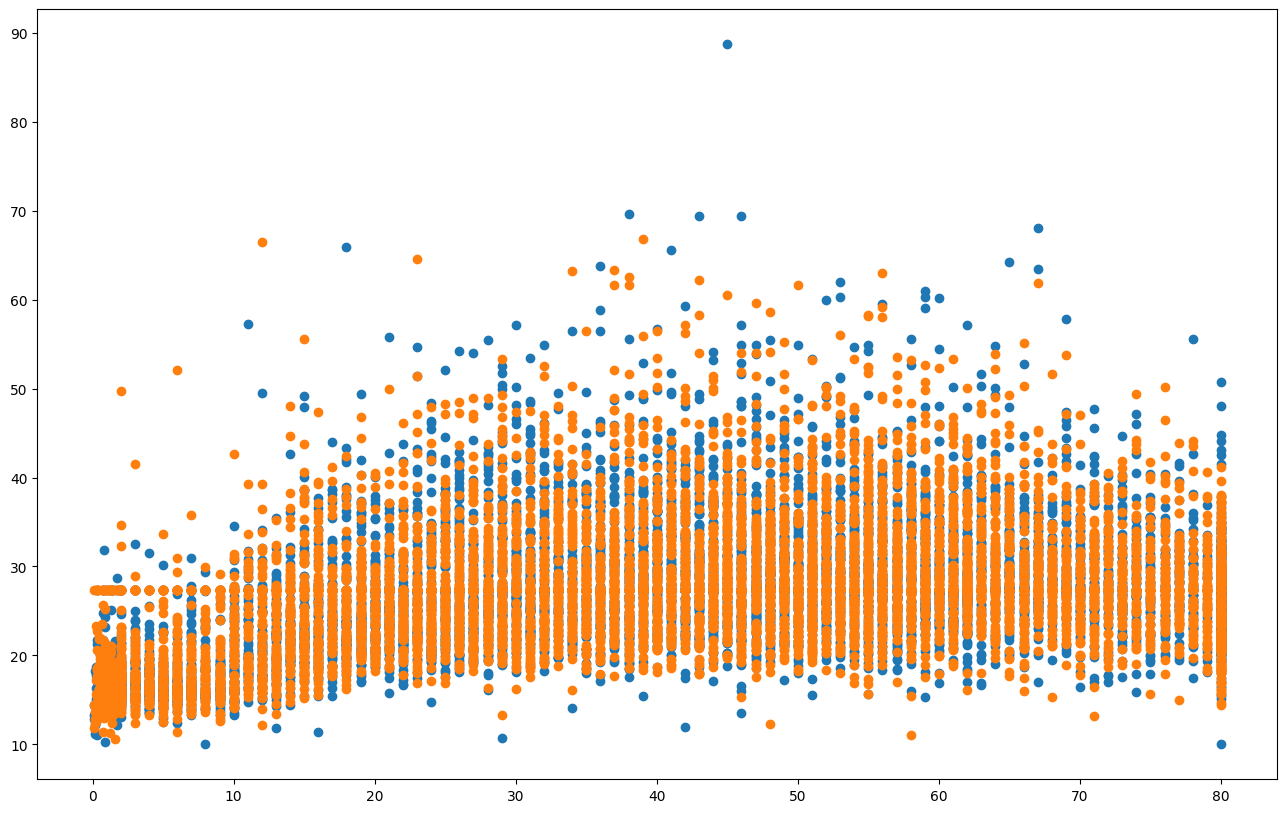

In [42]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rs = RandomUnderSampler()
X_res,y_res = rs.fit_resample(X,y) 

plt.figure(figsize=(16,10))
counter = Counter(y_res)
for i,j in counter.items():
    print(i)
    idx = np.where(y_res == i)[0]
    plt.scatter(X.loc[idx,'age'],X.loc[idx,'bmi'])

In [44]:
#Encoding the categorical variable

# Transforming the data by creaaing pipeline
cat_col = df.select_dtypes(include=object)
cat_col = list(cat_col)
cat_pipeline = Pipeline([
    ('ohe',OneHotEncoder(drop='first'))
])
preprocessor = ColumnTransformer([
    ('cat',cat_pipeline,cat_col)
],remainder='passthrough')

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

X_train_encoded= preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


In [45]:
#Model buliding

from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(X_train_encoded,y_train)
y_pred = ad.predict(X_test_encoded)
balanced_accuracy_score(y_test,y_pred)

0.9084903234825843

In [55]:
from sklearn.metrics import classification_report,recall_score,precision_score,confusion_matrix

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1687
           1       0.91      0.91      0.91      1713

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



In [56]:
print(confusion_matrix(y_test,y_pred))

[[1524  163]
 [ 148 1565]]


In [49]:
print('Recall Score:',recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))

Recall Score: 0.9136018680677175
precision score: 0.9056712962962963


In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (trees)
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R'],  # Different boosting algorithms
    # You can add more hyperparameters to tune here
}
gs = GridSearchCV(ad,param_grid=param_grid,cv=5,scoring='accuracy')
gs.fit(X_train_encoded,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [53]:
print(gs.best_params_)
print(gs.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}
0.9124264705882353
